# Find best degree polynomial

In [2]:
import pandas as pd
import numpy as np

In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

y = data.loc[136, '1/22/20':]

dates = data.columns.values[4:]

X = pd.DataFrame(np.arange(1, len(dates)+1))

(89,)
(89, 1)


# Perform train_test_split 

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Import LinearRegression, PolyReg & metrics

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

# Create numpy array to keep track of results

In [49]:
results = np.zeros(20)

# Loop over poly-degree values and check model performance

In [50]:
for i in range(0, 20):
    poly_reg = PolynomialFeatures(degree=i)
    lin_reg = LinearRegression()
    
    X_poly_train = poly_reg.fit_transform(X_train)
    
    lin_reg.fit(X_poly_train, y_train)
    
    X_poly_test = poly_reg.fit_transform(X_test)
    
    y_pred = lin_reg.predict(X_poly_test)
    
    results[i] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [51]:
print(results)

[4191.76586751 2712.09315464 1002.23631126  750.84921227  655.98224263
  342.39833573  327.19806718  263.74385593  190.90482412  244.74847348
  264.34587845  278.71119863  228.95558658  156.28547155  146.29655804
  208.0682295   269.15064903  305.52668925  312.64341694  290.04345743]


# Plot model accuracy (RMSE) for different degrees

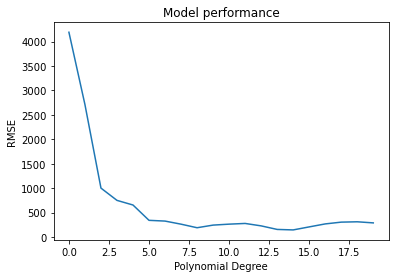

In [64]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, 20), results)
plt.title('Model performance')
plt.ylabel('RMSE')
plt.xlabel('Polynomial Degree')
plt.show()

# Create model with 'ideal' polynomial degree (seems like about 8)

In [53]:
poly_reg = PolynomialFeatures(degree=8)
lin_reg = LinearRegression()

X_poly = poly_reg.fit_transform(X)

lin_reg.fit(X_poly, y)

y_pred = lin_reg.predict(X_poly)

# Plot the model on the data

<class 'str'>


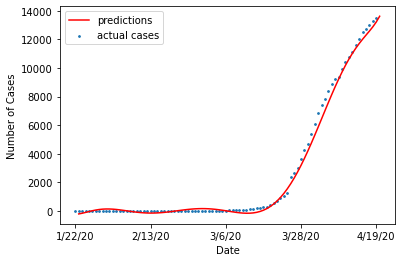

In [77]:
plt.scatter(dates, y, label='actual cases', s=3)
plt.plot(X, y_pred, label='predictions', color='r')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(dates[0::22])
plt.show()